# Support Vector Classifier
### Using SVC to classify letters

In [2]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Converting .gif images to vectors
'''
csv = open('letters.csv', 'w+')
text = ""

for case in ['upper', 'lower']:
    for letter in 'A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.split(' '):
        for number in range(100):
            text += letter
            f = cImage.FileIamge("training/{0}/{1}/{2}.gif".format(case, letter, number))
            for row in range(f.getHeight()):
                for col in range(f.getWidth()):
                    px = f.getPixel(col, row)
                    ave = (px.getRed() + px.getGreen() + px.getBlue()) / 3
                    text += (',{0}'.format(ave))
            text += '\n'

csv.write(text)
'''

In [3]:
# Read letters from CSV

l = pd.DataFrame.from_csv('letters.csv', header=None, index_col=None)

In [6]:
# Select test data, using 90% for training (since there are so many samples to begin with)
train_data = l.iloc[:, 1:401].sample(int(0.9 * len(l)))
train_target = l.iloc[train_data.index, 0]

test_data = l.iloc[:, 1:401].drop(train_data.index)
test_target = l.iloc[test_data.index, [0]]

### Classification Reports

In [7]:
# Classify data with an rbf support vector machine
svm = SVC()
svm.fit(train_data.values, np.ravel(train_target.values))

test_pred = svm.predict(test_data.values)
print(classification_report(np.ravel(test_target.values), test_pred))

             precision    recall  f1-score   support

          A       1.00      0.04      0.08        23
          B       1.00      0.04      0.08        25
          C       1.00      0.07      0.13        14
          D       1.00      0.12      0.21        25
          E       0.00      0.00      0.00        16
        EEF       0.00      0.00      0.00         0
          F       0.00      0.00      0.00        19
          G       1.00      0.06      0.11        17
          H       1.00      0.04      0.08        25
          I       1.00      0.06      0.11        18
          J       0.00      0.00      0.00        24
          K       0.00      0.00      0.00        16
          L       0.00      0.00      0.00        20
          M       1.00      0.05      0.09        22
          N       0.00      0.00      0.00        27
          O       1.00      0.04      0.08        24
          P       1.00      0.04      0.07        26
          Q       1.00      0.08      0.15   

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [8]:
# Classify data with a linear support vector machine
svm = SVC(kernel = 'linear')
svm.fit(train_data.values, np.ravel(train_target.values))

test_pred = svm.predict(test_data.values)
print(classification_report(np.ravel(test_target.values), test_pred))

             precision    recall  f1-score   support

          A       1.00      1.00      1.00        23
          B       1.00      1.00      1.00        25
          C       0.75      0.64      0.69        14
          D       1.00      1.00      1.00        25
          E       1.00      1.00      1.00        16
        EEF       0.00      0.00      0.00         0
          F       1.00      0.95      0.97        19
          G       1.00      1.00      1.00        17
          H       1.00      1.00      1.00        25
          I       0.71      0.56      0.63        18
          J       0.96      0.96      0.96        24
          K       0.94      1.00      0.97        16
          L       1.00      1.00      1.00        20
          M       1.00      0.91      0.95        22
          N       0.96      0.96      0.96        27
          O       0.87      0.83      0.85        24
          P       1.00      1.00      1.00        26
          Q       1.00      1.00      1.00   

In [18]:
# Classify data with a linear support vector machine
svm = SVC(kernel = 'sigmoid')
svm.fit(train_data.values, np.ravel(train_target.values))

test_pred = svm.predict(test_data.values)
print(classification_report(np.ravel(test_target.values), test_pred))

             precision    recall  f1-score   support

          A       0.00      0.00      0.00        23
          B       0.00      0.00      0.00        25
          C       0.00      0.00      0.00        14
          D       0.00      0.00      0.00        25
          E       0.00      0.00      0.00        16
          F       0.00      0.00      0.00        19
          G       0.00      0.00      0.00        17
          H       0.00      0.00      0.00        25
          I       0.00      0.00      0.00        18
          J       0.00      0.00      0.00        24
          K       0.00      0.00      0.00        16
          L       0.00      0.00      0.00        20
          M       0.00      0.00      0.00        22
          N       0.00      0.00      0.00        27
          O       0.00      0.00      0.00        24
          P       0.00      0.00      0.00        26
          Q       0.00      0.00      0.00        24
          R       0.00      0.00      0.00   

Linear seems to be the best fit for this problem, classifying points with about 90% precision.

NOTE: When using a polynomial suport vector machine, the kernel stops responding.

### Confusion Matrix for Linear Kernel

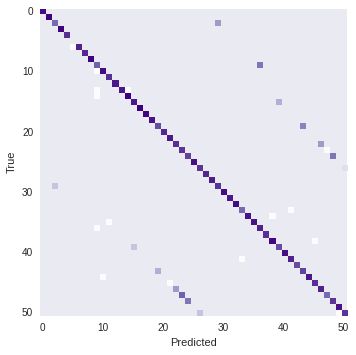

In [17]:
plt.imshow(np.log(confusion_matrix(np.ravel(test_target.values), test_pred)), cmap = 'Purples', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('True')
plt.xlabel('Predicted')